# Bagging Method

### What is the Bagging Method?
- Bagging is the aggregation of multiple versions of a predicted model. Each model is trained individually, and combined using an averaging process. The primary focus of bagging is to achieve less variance than any model has individually. To understand bagging, let’s first understand the term bootstrapping.

![alt text](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bagging.PNG)

### Bootstrapping:
- Bootstrapping is the method of randomly creating samples of data out of a population with replacement to estimate a population parameter.

![alt text](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bootstrapping.PNG)

### Pros and Cons
Pros
- Reduces model over fitting

- performs well with high dimensional data

- missing values in a dataset dont affect the performance

Cons
- gives its final prediction based on the mean predictions from the subset trees, rather than outputting the precise values for the classification or regression model.

Lets take a look at our data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

df = pd.read_csv("/Users/chan/Desktop/Data Science 4/Github Repository/Datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


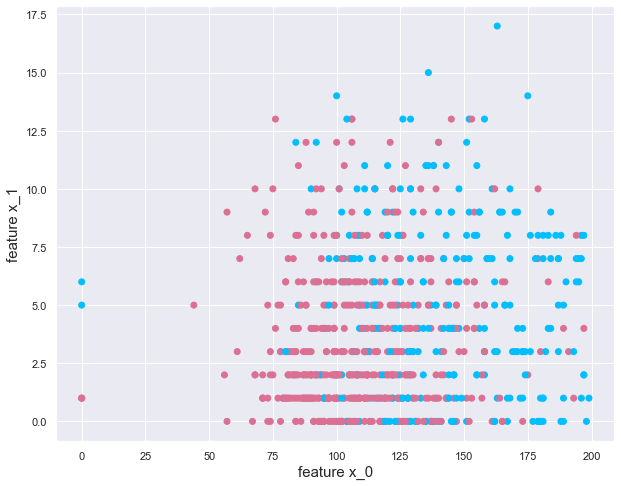

In [2]:
X = df[["Glucose", "Pregnancies"]].values
y = df.Outcome.values

colors = ["palevioletred" if Outcome == 0 else "deepskyblue" for Outcome in y]
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

This will give us our test splits while training the data and also show us how accurate the model is given the training data.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        99
           1       0.67      0.51      0.58        55

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.70      0.55      0.61        55

    accuracy                           0.75       154
   macro avg       0.74      0.71      

this will show the best estimators possible for the best overal average.

In [20]:
from sklearn.model_selection import GridSearchCV

parameters = { "n_estimators": [15, 25, 50, 75, 100, 200, 400, 500], 
"bootstrap": [True], "n_jobs": [-1]}

bag = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42))
classifier = GridSearchCV(bag, parameters)
classifier.fit(X_train, y_train)
classifier_pred = classifier.predict(X_test)
print(f"Best Bagging Classification Report")
print(classification_report(y_test, classifier_pred), "\n")
classifier.cv_results_["params"][-1]
#classifier.cv_results_.keys()

Best Bagging Classification Report
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        99
           1       0.78      0.38      0.51        55

    accuracy                           0.74       154
   macro avg       0.76      0.66      0.67       154
weighted avg       0.75      0.74      0.71       154
 



{'bootstrap': True, 'n_estimators': 500, 'n_jobs': -1}

We see that our best possible average come back when our estimator is at 500 for our bagging method.

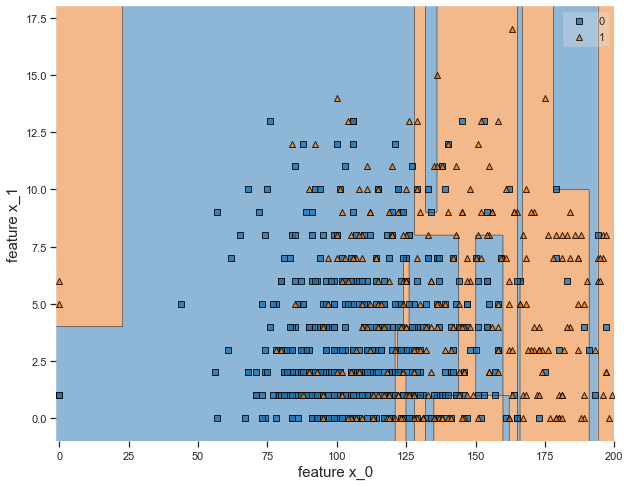

In [4]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()


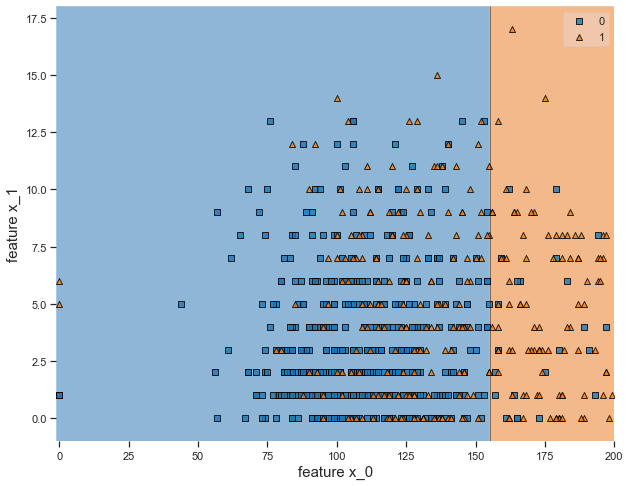

In [5]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()